In [297]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Name: Ishan Ratna Bajracharya

Student ID: 2329789

Detailed description about the dataset:


*   Dataset Name : California Housing Prices
*   Dataset Owner : Cam Nugent
*   Created Date : Not specified 6 years ago
*   Dataset Link : https://www.kaggle.com/datasets/camnugent/california-housing-prices/data







Pick a Domain and Dataset you are interested in:

In [298]:
#importing required library for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [299]:
#Read a csv file into a DataFrame from MyDrive
df = pd.read_csv("/content/drive/MyDrive/Classification and Regression/housing.csv")
#Listing out the attributes (columns) of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2003 non-null   float64
 1   latitude            2003 non-null   float64
 2   housing_median_age  2003 non-null   int64  
 3   total_rooms         2003 non-null   int64  
 4   total_bedrooms      1992 non-null   float64
 5   population          2003 non-null   int64  
 6   households          2003 non-null   int64  
 7   median_income       2003 non-null   float64
 8   median_house_value  2003 non-null   int64  
 9   ocean_proximity     2003 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 156.6+ KB


In [300]:
#Basic fitness of the dataset
df.shape

(2003, 10)

Inspect your Data:

In [301]:
#Total size of the dataset
df.size

20030

In [302]:
#Printing the type of data
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [303]:
#Missing values from each column
df.isnull().sum()


longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        11
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [304]:
#Total missing values
missing_values = df.isnull().sum().sum()
print(missing_values)

11


In [305]:
#Total Missing percentage
missing_percentage = round((df.isnull().sum().sum() /df.shape[0])*100, 2)
print(missing_percentage)

0.55


In [306]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column, df[column].unique())


housing_median_age [41 21 52 42 50 40 49 48 51 43  2 46 26 20 17 36 19 23 38 35 10 16 27 39
 31 29 22 37 28 34 32 47 44 30 18 45 33 24 15 14 13 25  5 12  6  8  9  7
  3  4 11]
total_rooms [ 880 7099 1467 ... 1461 2114 1404]
population [ 322 2401  496 ... 1386 2050 1515]
households [ 126 1138  177  219  259  193  514  647  595  714  402  734  468  174
  620  264  331  303  419  275  166  366  478  325  422  119  239  397
  473  155  378  441  335  329  536  374  403  309  696  395  249  189
  198  292  382  304  253  160  352  438  407  720  400  233  220  244
   57  187   23  122  159  133  332  147   82  611  127  277  152    7
  439  509  207  289   56   87  169  115  380  330   39   85  362   88
   34  302  467 2323 1180   91 1250  980 1497  228  613 1789  456  718
  802 1022 1217  519  291 1661 1037  373  485  376   47  555  367  956
  479  597  654  343  496  194  443  766  190  211  269  263  176  500
   52  350  426  552  487  224  308  460  515  340  521  459  213  258
  327  2

The actual cause of missing value is due to data entry error, no responses from the survey.                   

Data Cleaning and Summary Statistics
Data Cleaning:

The follwing techniques are used to fill the missing values because:

1. For every variable we cannot calculate average value and replace it since there are strings as well so we used mode for some variables.

2. In 'description' we filled the value with some random string.

In [307]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [308]:
#Checking if the missing values are filled or not
df.isnull().sum()
#No missing values are shown

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [309]:
# To identify duplicate rows
rows = df[df.duplicated()]
total_dup = df.duplicated().sum()
#Printing the duplicate rows
print(f"total duplicate rows:{total_dup}")

#Removing duplicates from the observation
df.drop_duplicates(inplace = True)
print("After:")
print(df)
df.reset_index(drop=True, inplace=False)

total duplicate rows:0
After:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.23     37.88                  41          880           129.0   
1       -122.22     37.86                  21         7099          1106.0   
2       -122.24     37.85                  52         1467           190.0   
3       -122.25     37.85                  52         1274           235.0   
4       -122.25     37.85                  52         1627           280.0   
...         ...       ...                 ...          ...             ...   
1998    -119.77     36.75                  39         1287           332.0   
1999    -119.77     36.74                  20         1855           519.0   
2000    -119.78     36.74                  15         1461           415.0   
2001    -119.78     36.75                  35         2114           506.0   
2002    -119.78     36.75                  31         1404           379.0   

      population  households  med

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
1998,-119.77,36.75,39,1287,332.0,1386,306,1.5227,46900,INLAND
1999,-119.77,36.74,20,1855,519.0,1091,443,1.5547,93900,INLAND
2000,-119.78,36.74,15,1461,415.0,924,356,2.5045,90300,INLAND
2001,-119.78,36.75,35,2114,506.0,2050,474,1.2375,50000,INLAND


Summary Statistics:

For Numeric Column:

In [310]:
#Using descriptive function to gather basic statistical information about the variables
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000
mean,-121.936810,38.064588,31.304044,2595.683974,503.000000,1243.733400,468.075387,3.882106,191764.117823
std,0.577357,0.657426,14.044774,2107.867998,378.810573,965.390742,359.665484,1.910968,96448.836629
min,-124.300000,36.720000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,22500.000000
25%,-122.240000,37.740000,19.000000,1407.500000,280.000000,691.500000,260.000000,2.535100,117550.000000
50%,-122.090000,37.860000,32.000000,2084.000000,408.000000,1003.000000,377.000000,3.505700,174200.000000
75%,-121.900000,37.990000,43.000000,3086.000000,605.000000,1496.500000,555.500000,4.919300,240800.000000
max,-119.770000,41.950000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500001.000000


In [311]:
#Finding the variance seperately since df.descibe dosen't show variance
variance = df.var(ddof = 1)
#Print variance
print(f"The variance of each column in dataset is :\n {variance}")

The variance of each column in dataset is :
 longitude             3.333407e-01
latitude              4.322092e-01
housing_median_age    1.972557e+02
total_rooms           4.443107e+06
total_bedrooms        1.434975e+05
population            9.319793e+05
households            1.293593e+05
median_income         3.651799e+00
median_house_value    9.302378e+09
dtype: float64


<ipython-input-311-1feea3f09f51>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var(ddof = 1)


While observing th output, I fount out that df.describe() (descriptive function)is used to gather basic statistical information of the variables except variance. So, I calculated the variance seperately.

For Categorical Column:

In [312]:
#Exploring unique values from objects
object_columns = df.select_dtypes(include = ['object'])
#Iterate through each object column
for column in object_columns:
  #Unique value for each col
  unique_vals = df[column].unique()
  print(f"Unique values for {column}: {unique_vals}")

Unique values for ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN']


In [313]:
#Finding mode of asked variable
mode_values = df[object_columns.columns].mode().iloc[0]
print("\n Mode of character variables:")
print(mode_values)


 Mode of character variables:
ocean_proximity    NEAR BAY
Name: 0, dtype: object


Visualize the Data: Make Interpret and Save your Charts

Univariate Analysis:

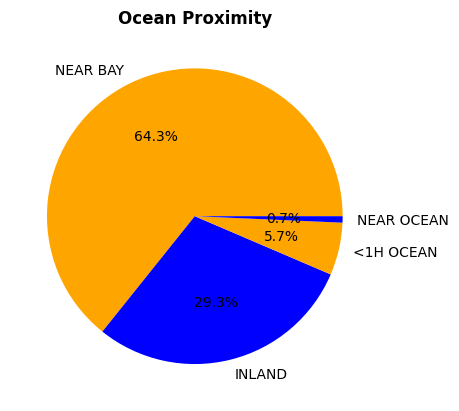

In [314]:
plt.title("Ocean Proximity", fontweight='bold')
colors = ['orange', 'blue']
plt.pie(x = df["ocean_proximity"].value_counts(), labels=df["ocean_proximity"].value_counts().index, autopct = lambda x:f"{x:.1f}%", colors=colors)
plt.show()

Here in the pie chart above, I am plotting ocean proximity. So in case of near bay,near ocean , 1<H ocean and in land. Most of them is near bay by 64.3% and inland is 29.3%.

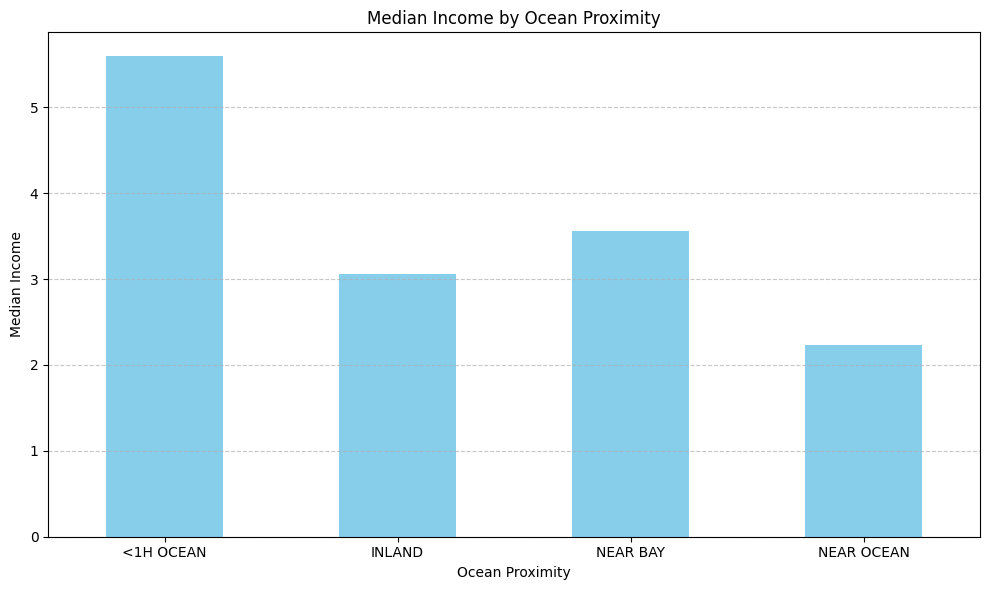

In [315]:
median_income_by_proximity = df.groupby('ocean_proximity')['median_income'].median()

# Create bar plot
plt.figure(figsize=(10, 6))
median_income_by_proximity.plot(kind='bar', color='skyblue')
plt.title('Median Income by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In the bar graph or count plot above, we can observe that it shows the data of ocean proximity and median income. 1H OCEAN has the highest median income where as the lowest is the near ocean . INLAND and NEARBAY has 3.6 and 3.1 median income respectively.

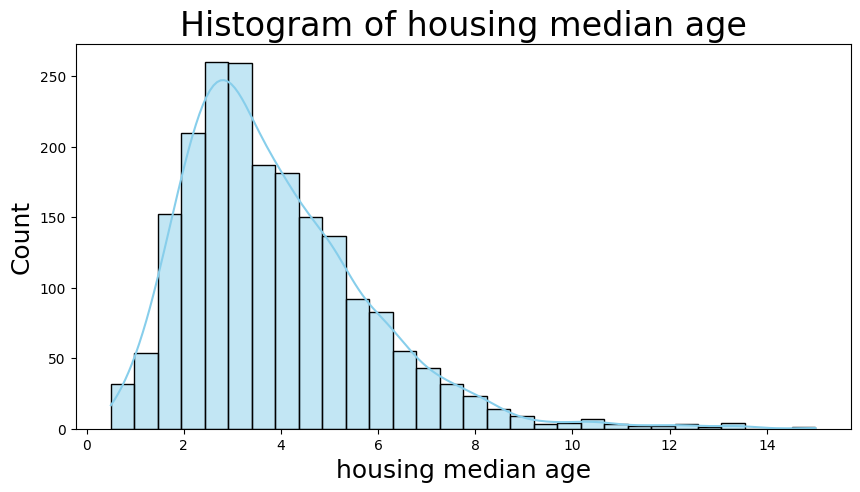

In [316]:
plt.figure(figsize = (10,5))
#Create histplot for  median income
sns.histplot(df['median_income'], bins = 30, kde = True, color = 'skyblue')
#Set title and label
plt.title('Histogram of housing median age', fontsize = 24)
plt.xlabel('housing median age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.show()

A histogram is a graph that displays the distribution of your continuous data. Here I shows the histograph of housing median age. The histogram is divided into 30 bins or intervals and the height of movies or shows fall within each interval. The histogram shows that the majority of housing median age have a runticountme between approximately 2-6 age.

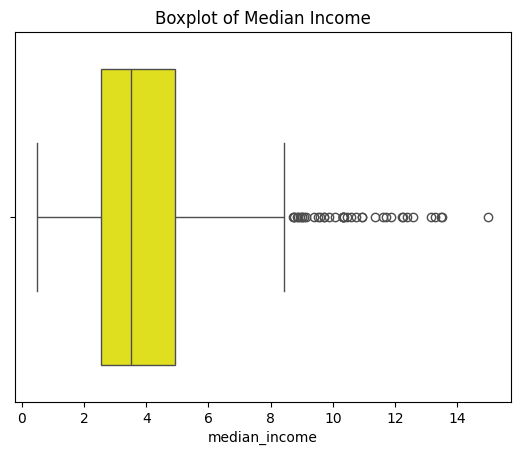

In [317]:
#Outliers present in dataset creating boxplot
sns.boxplot(x = df['median_income'], color='yellow')
plt.title('Boxplot of Median Income')
plt.show()

Box plots are useful for identifying the spread of data, the presence of outliers, and the symmetry of the data. The box in the middle of the chart extend to the highest and lowest calues that are not sonsidered outliers. The outliers are shown as small circles beyond whiskers. The median income is around 4, and the quartiles are around 9 and 14.

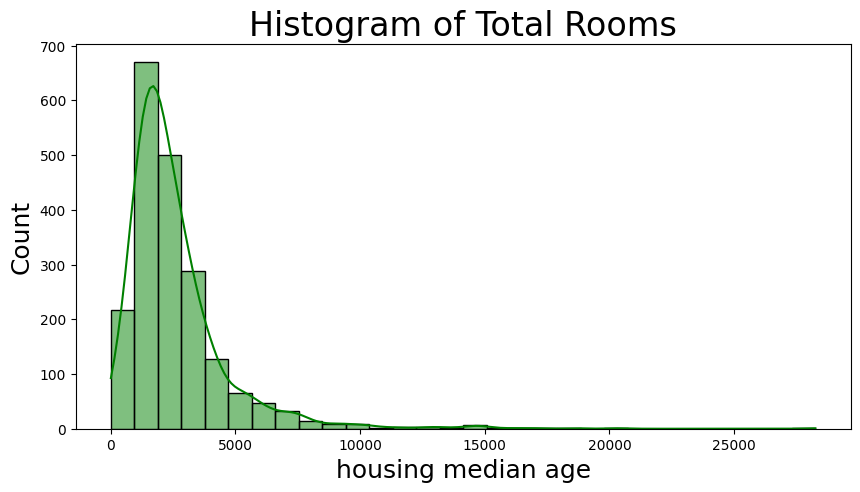

In [318]:
plt.figure(figsize = (10,5))
#Create histplot for total rooms
sns.histplot(df['total_rooms'], bins = 30, kde = True, color = 'green')
#Set title and label
plt.title('Histogram of Total Rooms', fontsize = 24)
plt.xlabel('housing median age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.show()

A histogram is a graph that displays the distribution of your continuous data. This data is also divided into 700 intervals. The height of each bar represents the number of movies that were released in each of the interval. The histogram shows that the housing median has increased over time, with a peak in the 2000s. The distribution is roughly symmetric, with a slight skew to the right. This suggests that thehousing median age were count , with fewer movies being released in the earlier years.

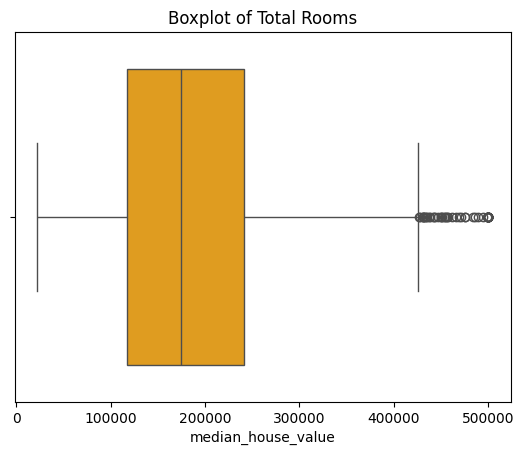

In [319]:
#Outliers present in dataset creating boxplot
sns.boxplot(x = df['median_house_value'], color='orange')
plt.title('Boxplot of Median House')
plt.show()

The x-axis shows the release year and the y-axis median_house_value for total rooms. The median Median house value has 100000 to 200000. There are a few outliners on the high end of the distribution. Overall, the boxplot shows the there is a wide range of range of release yars for the movies and shows in this dataset.


Bi-variate Analysis:

In [320]:
#Identify and select colummns with numeric data types
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
#Identify and select columns with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

#Creating df for numeric and categorical columns
df_numeric = df[numeric_columns]
df_categorical = df[categorical_columns]

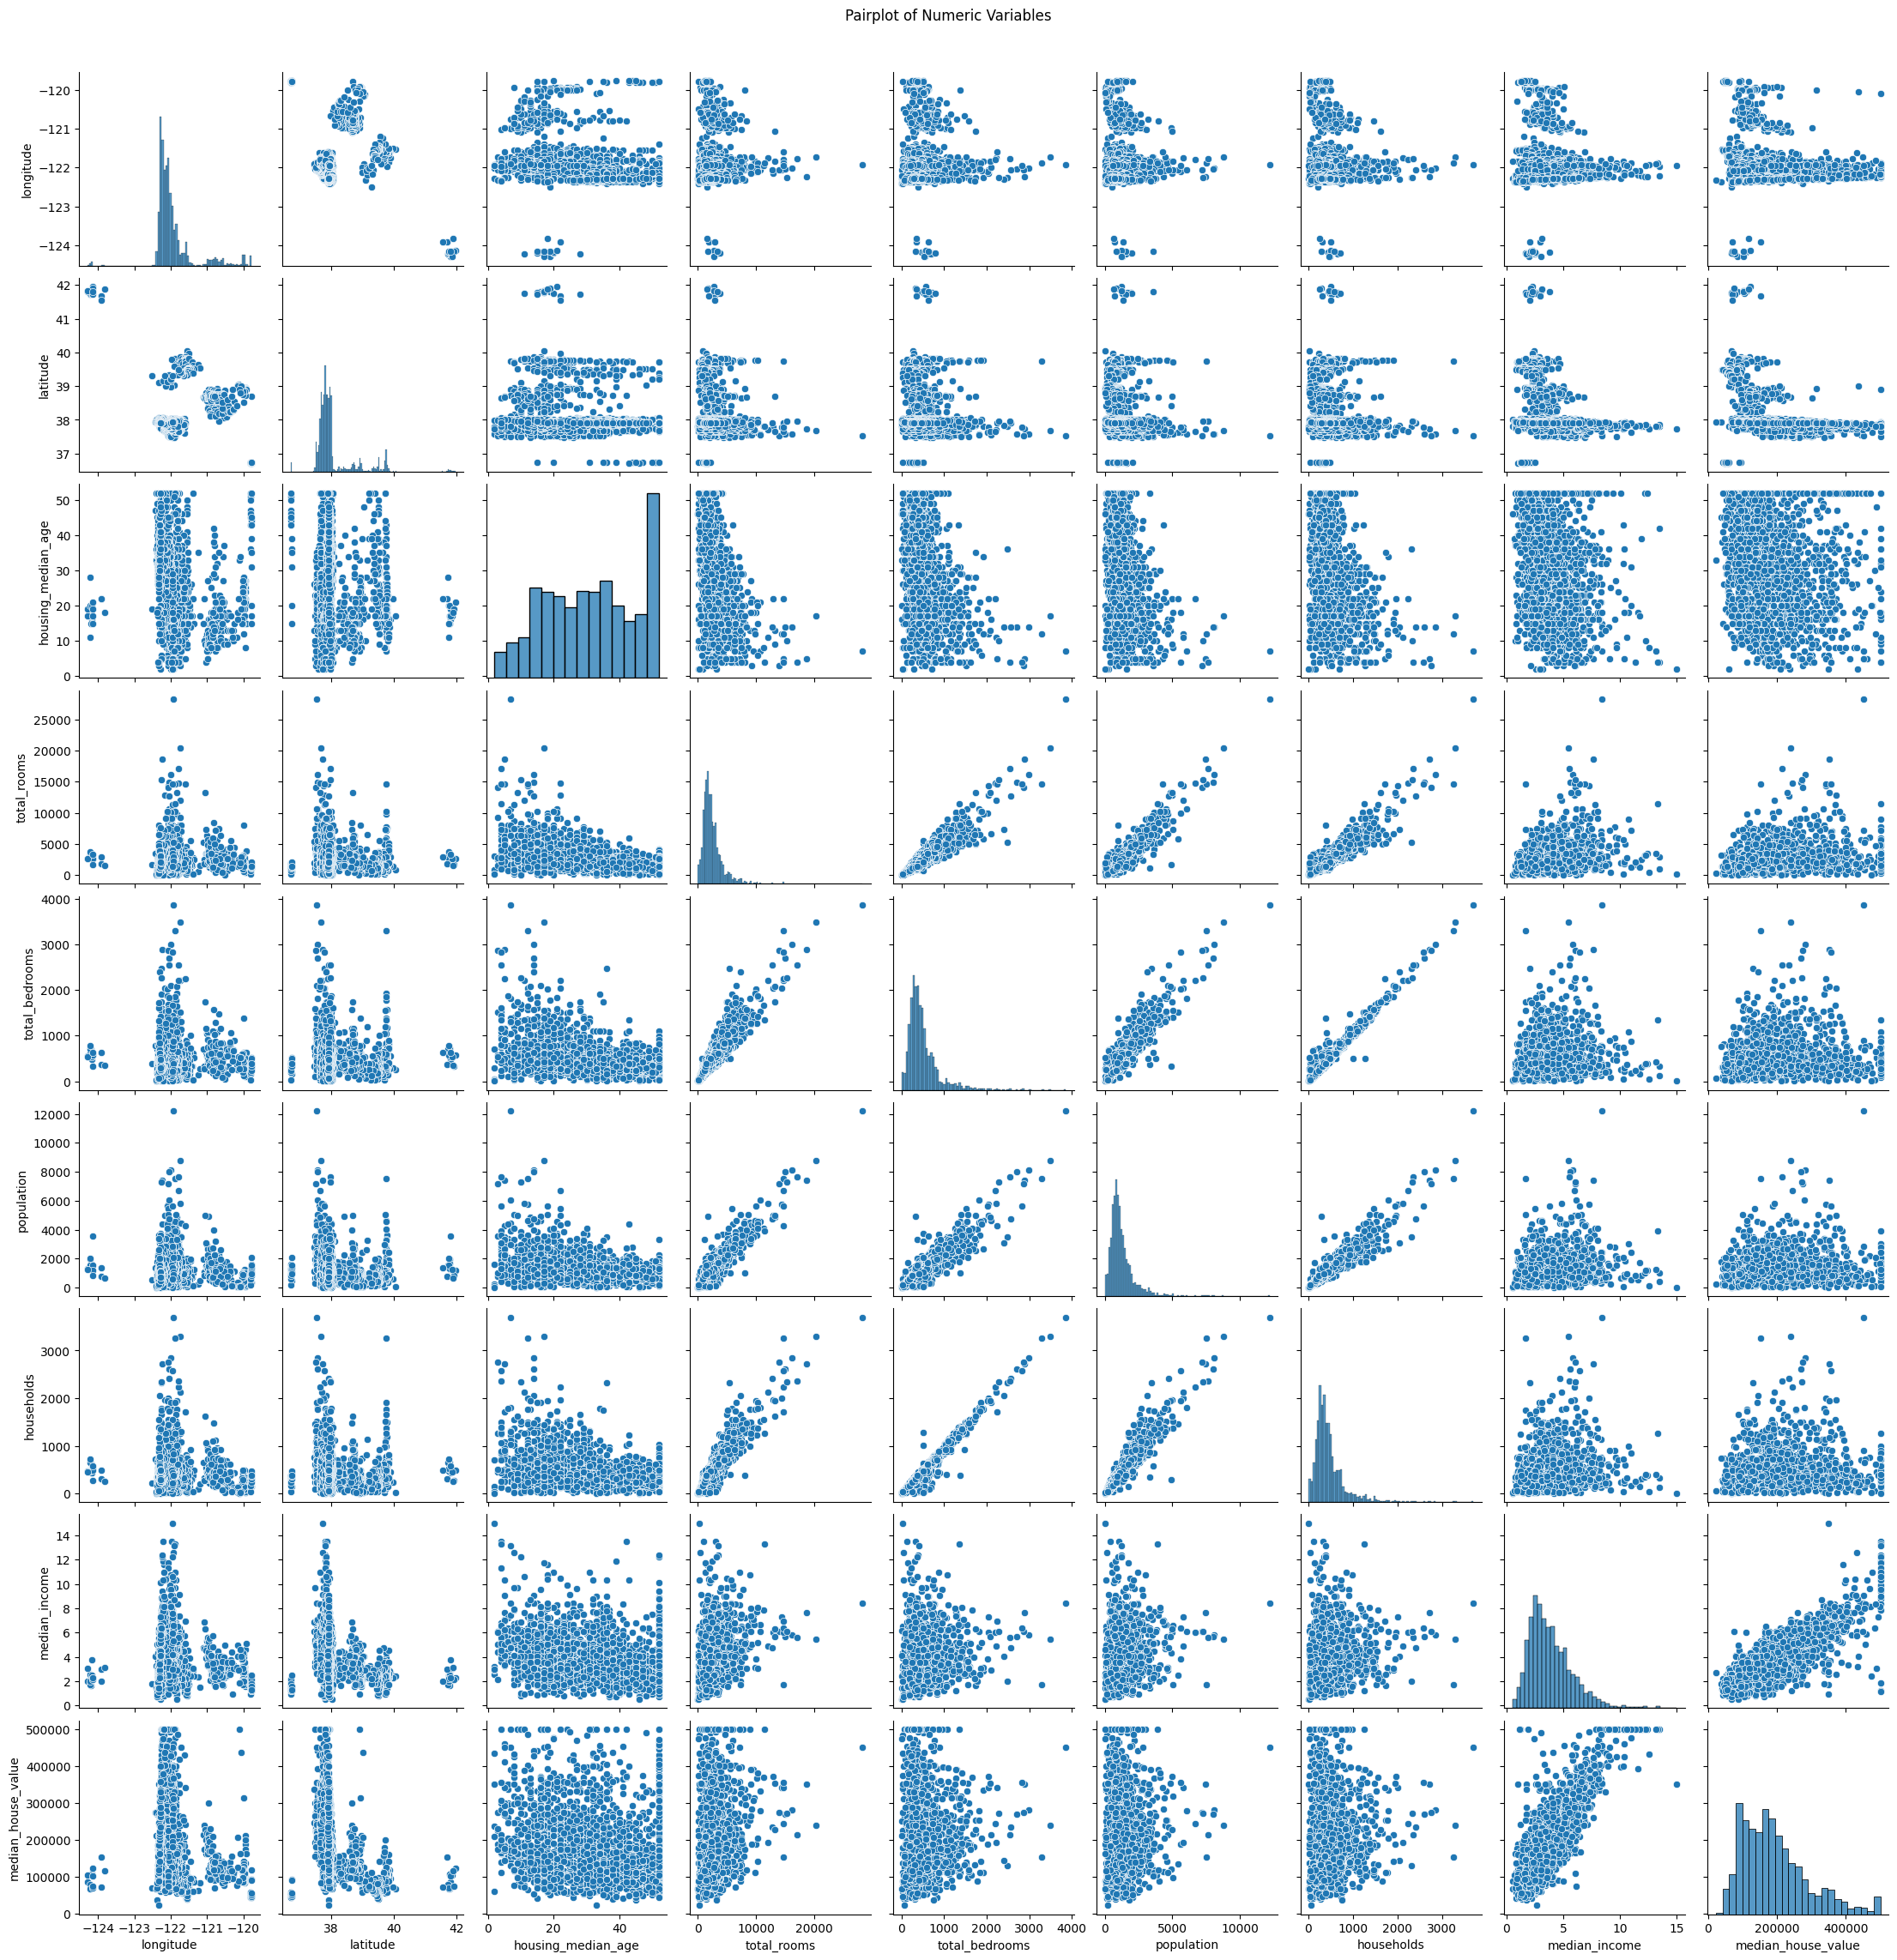

In [321]:
#Create a pairplot for numeric variabes in the dataframe
sns.pairplot(df_numeric)
#adding title
plt.suptitle('Pairplot of Numeric Variables' , y = 1.02)
plt.show()

The above chart shows scatter plot or the pairplot. A pariplor is a grid of plots that shows the relationship between each pair of variables in a dataset. This figure is the representation of numeric values only. The categoric values were seperated from the numeric ones to plot he scatter plot. In my dataset there were only one catagorical column.
Basically, it is the summary of the datas of every numeric column in the dataset.



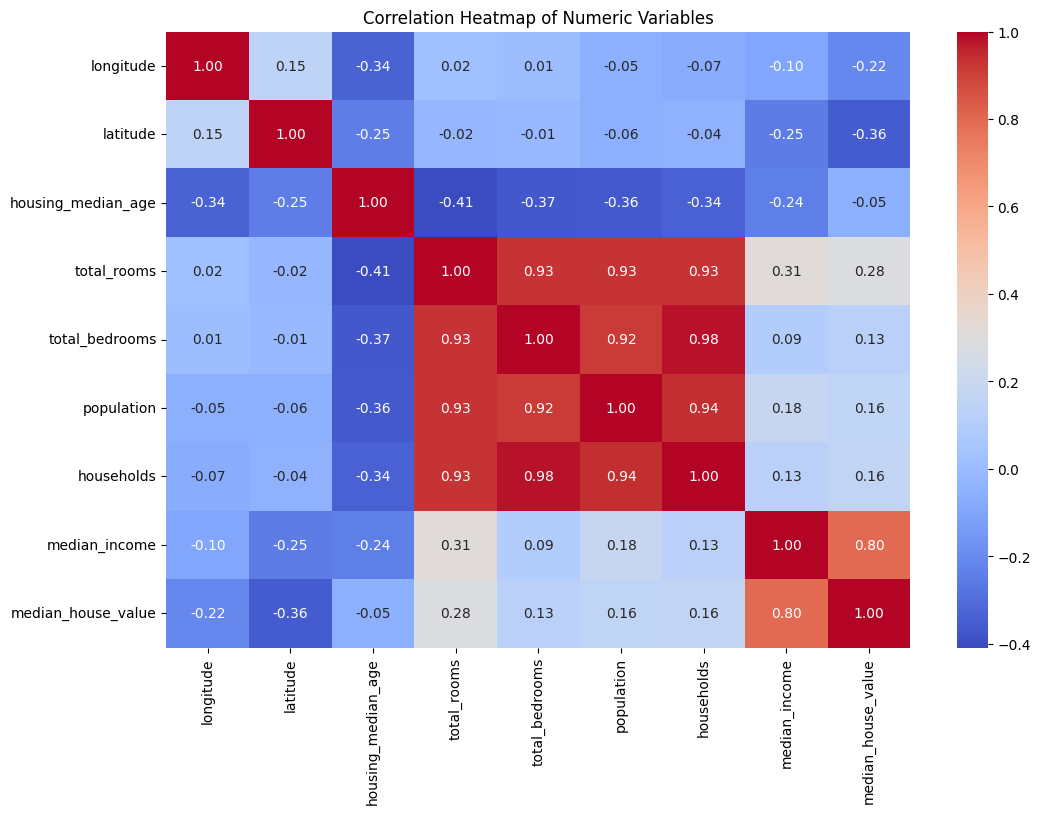

In [322]:
#THis code helps to calculate the correlation matrix for numeric values
correlation_matrix = df_numeric.corr()

plt.figure(figsize = (12,8))

#Create a heatmap with correlation values annoated
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
#Adding title
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The heatmap is useful for identifying patterns and relationships between the variables in your DataFrame. The x-axis and y-axis represent the names of the numeric variables, and each cell in the heatmap represents the correlation between two variables. The correlation coefficient ranges from -1 to 1, with negative values indicating a negative correlation and vice versa. The values close to 0 indicates no correlation.

# **CLASSIFICATION**

In [323]:
# df = pd.get_dummies(df, columns=["households", "median_income", "population", "median_house_value"])

X = df.drop("ocean_proximity", axis=1)
y = df["ocean_proximity"]

le = LabelEncoder()
y = le.fit_transform(y)

y_binary = [1 if label == 1 else 0 for label in y]
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion = "entropy",random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(X)
# Compute precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9950124688279302
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.23     37.88                  41          880           129.0   
1       -122.22     37.86                  21         7099          1106.0   
2       -122.24     37.85                  52         1467           190.0   
3       -122.25     37.85                  52         1274           235.0   
4       -122.25     37.85                  52         1627           280.0   
...         ...       ...                 ...          ...             ...   
1998    -119.77     36.75                  39         1287           332.0   
1999    -119.77     36.74                  20         1855           519.0   
2000    -119.78     36.74                  15         1461           415.0   
2001    -119.78     36.75                  35         2114           506.0   
2002    -119.78     36.75                  31         1404           379.0   

      population  households  medi

DecisionTreeClassifierVisualization

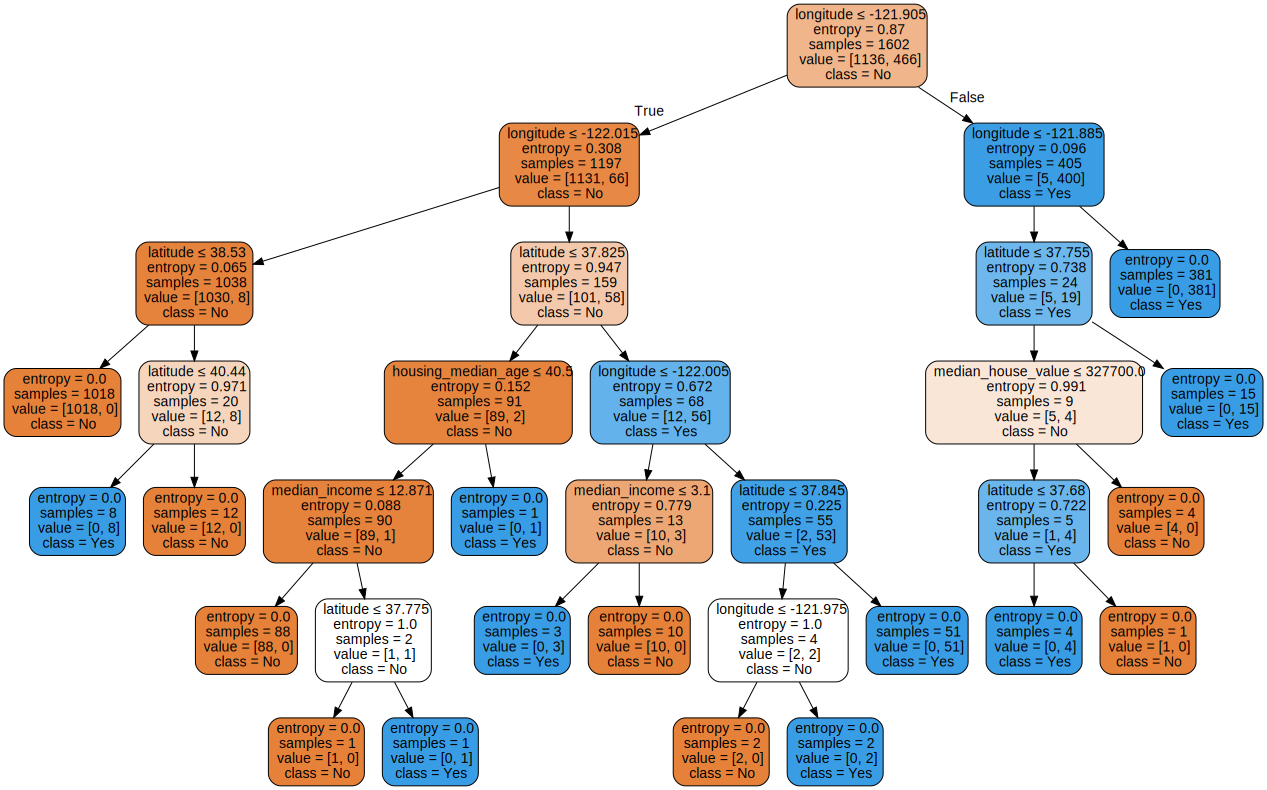

In [324]:
dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=X.columns,
                      class_names=["No", "Yes"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

Entropy is a measure of impurity or disorder in a set of data. In the context of decision tree classifiers, entropy is used as a criterion to determine the best split at each node of the tree. The goal is to find splits that reduce entropy, thus increasing the homogeneity or purity of the subsets created by the split.





Confusion Matrix for Decision Tree Classifier

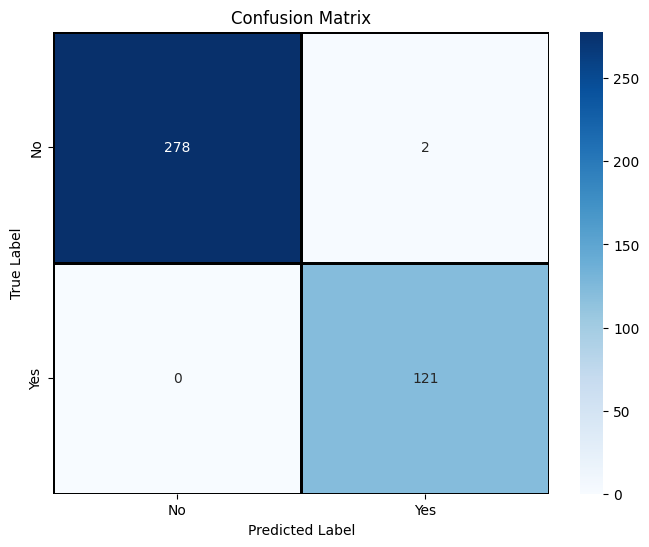

In [325]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"], linecolor = 'black',linewidth = 1)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

278 instances were correctly classified as negative (class 0).
2 instances were incorrectly classified as positive (class 1) when they actually belong to the negative class.
0 instances were incorrectly classified as negative (class 0) when they actually belong to the positive class.
121 instances were correctly classified as positive (class 1).

ROC Curve for Decision Tree Classifier

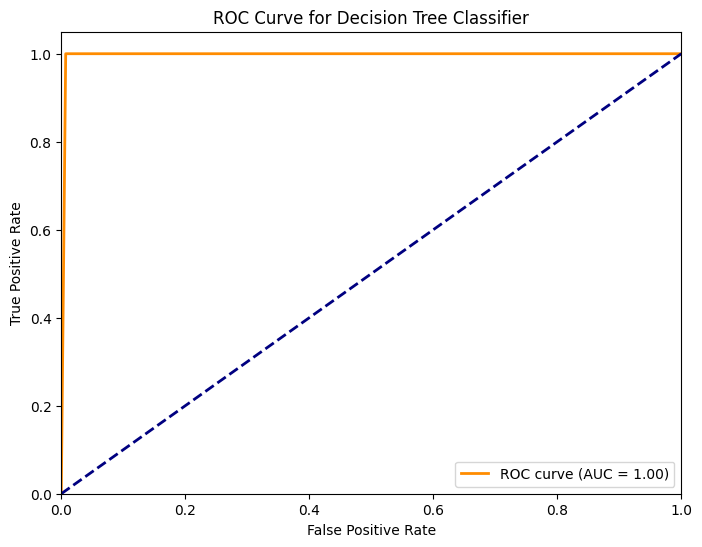

In [326]:
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

In [327]:
print(classification_report(
    y_test,
    y_pred,
    target_names = ['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       1.00      0.99      1.00       280
          No       0.98      1.00      0.99       121

    accuracy                           1.00       401
   macro avg       0.99      1.00      0.99       401
weighted avg       1.00      1.00      1.00       401



Cross Validation for Decission Tree Classifier

In [328]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have your data in X and y

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define the number of folds
scores = cross_val_score(clf, X, y_binary, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Cross Validation Scores: [0.99501247 0.9925187  0.9925187  0.9975     0.99      ]
Mean Accuracy: 0.9935099750623442
Standard Deviation of Accuracy: 0.002548056165042313


**Logistic Regression Classifier**

In [329]:
# Models
import xgboost as xgb
import lightgbm as lgb
# import category_encoders as ce
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [330]:
def get_model(X_train, y_train, X_test, y_test, model_type, vrtbose=0):

    np.random.seed(42)

    if model_type == 'logistic_regression':
        model = LogisticRegression()
    else:
        raise ValueError('Invalid model type')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculate the accuracies
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = model.score(X_train, y_train)

    # print the accuracies
    print(f'Test Accuracy for {model_type}: {acc_test:.3f}')
    print(f'Train Accuracy for {model_type}: {acc_train:.3f}')
    print()

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {model_type}:\n', cm)
    print()

    print(f'Classification Report for {model_type}:\n', classification_report(y_test, y_pred))

    # print the first 10 predictions
    # print(f'Predictions for {model_type} (show first 10):\n', model.predict(X_test)[:10])
    # print()

    # cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross Validation scores:\n', cv_scores)
    print(f'Mean Score of {cv_scores.mean():.2f} with a standard deviation of {cv_scores.std():.2f}')

    return model, acc_test, acc_train

model_types = ['logistic_regression']

results = {'Model': [],
           'Test Accuracy': [],
           'Train Accuracy': []}

for model_type in model_types:
    print(f'Model - {model_type}: ')
    print()

    model, acc_test, acc_train = get_model(X_train, y_train, X_test, y_test, model_type, vrtbose=0)
    results['Model'].append(model_type.capitalize())
    results['Test Accuracy'].append(acc_test)
    results['Train Accuracy'].append(acc_train)
    print('----------------------------------')
    print()


Model - logistic_regression: 

Test Accuracy for logistic_regression: 0.820
Train Accuracy for logistic_regression: 0.829

Confusion Matrix for logistic_regression:
 [[251  29]
 [ 43  78]]

Classification Report for logistic_regression:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       280
           1       0.73      0.64      0.68       121

    accuracy                           0.82       401
   macro avg       0.79      0.77      0.78       401
weighted avg       0.82      0.82      0.82       401



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation scores:
 [0.82242991 0.84423676 0.81875    0.81875    0.803125  ]
Mean Score of 0.82 with a standard deviation of 0.01
----------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression

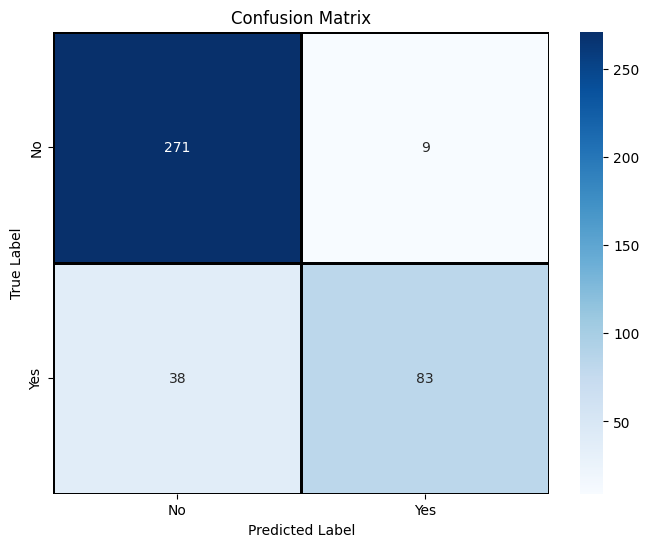

In [331]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"], linecolor = 'black',linewidth = 1)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

251 instances were correctly classified as negative (class 0).
29 instances were incorrectly classified as positive (class 1) when they actually belong to the negative class.
43 instances were incorrectly classified as negative (class 0) when they actually belong to the positive class.
78 instances were correctly classified as positive (class 1).

ROC Curve for Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


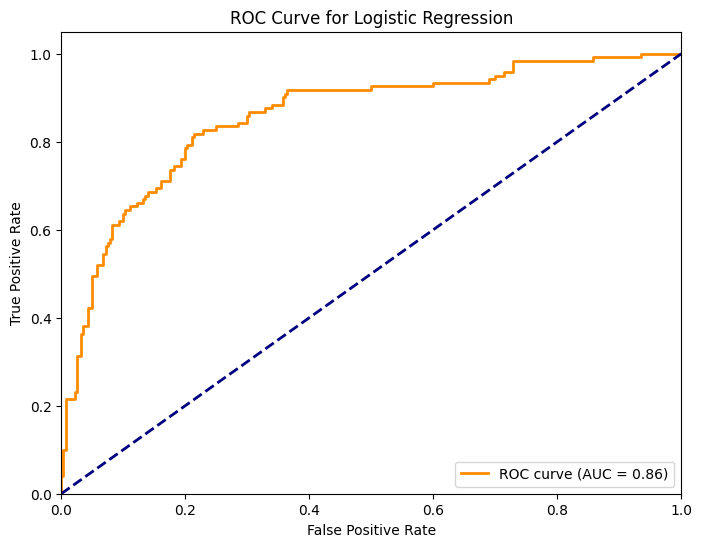

In [332]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = logistic_reg_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

Cross Validation Score of Logistic Regression

In [333]:
logistic_reg_model = LogisticRegression()

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define the number of folds
scores = cross_val_score(logistic_reg_model, X, y_binary, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross Validation Scores: [0.82044888 0.85286783 0.83042394 0.815      0.8175    ]
Mean Accuracy: 0.8272481296758105
Standard Deviation of Accuracy: 0.013839995500846844


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature Selection using Filter **Method**

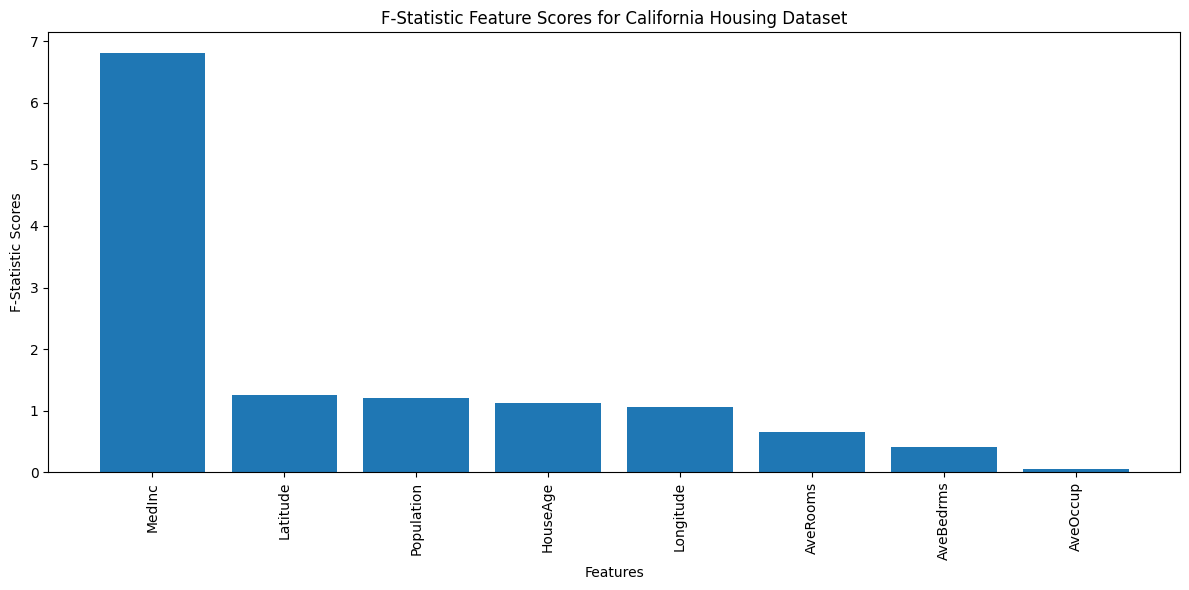

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Create an instance of SelectKBest with f_classif scoring and specify k
k_best = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and F-statistic scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': feature_names, 'F-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='F-Statistic', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['F-Statistic'])
plt.xlabel('Features')
plt.ylabel('F-Statistic Scores')
plt.title('F-Statistic Feature Scores for California Housing Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


**Task Flow**

<ipython-input-355-a7bc15dde189>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


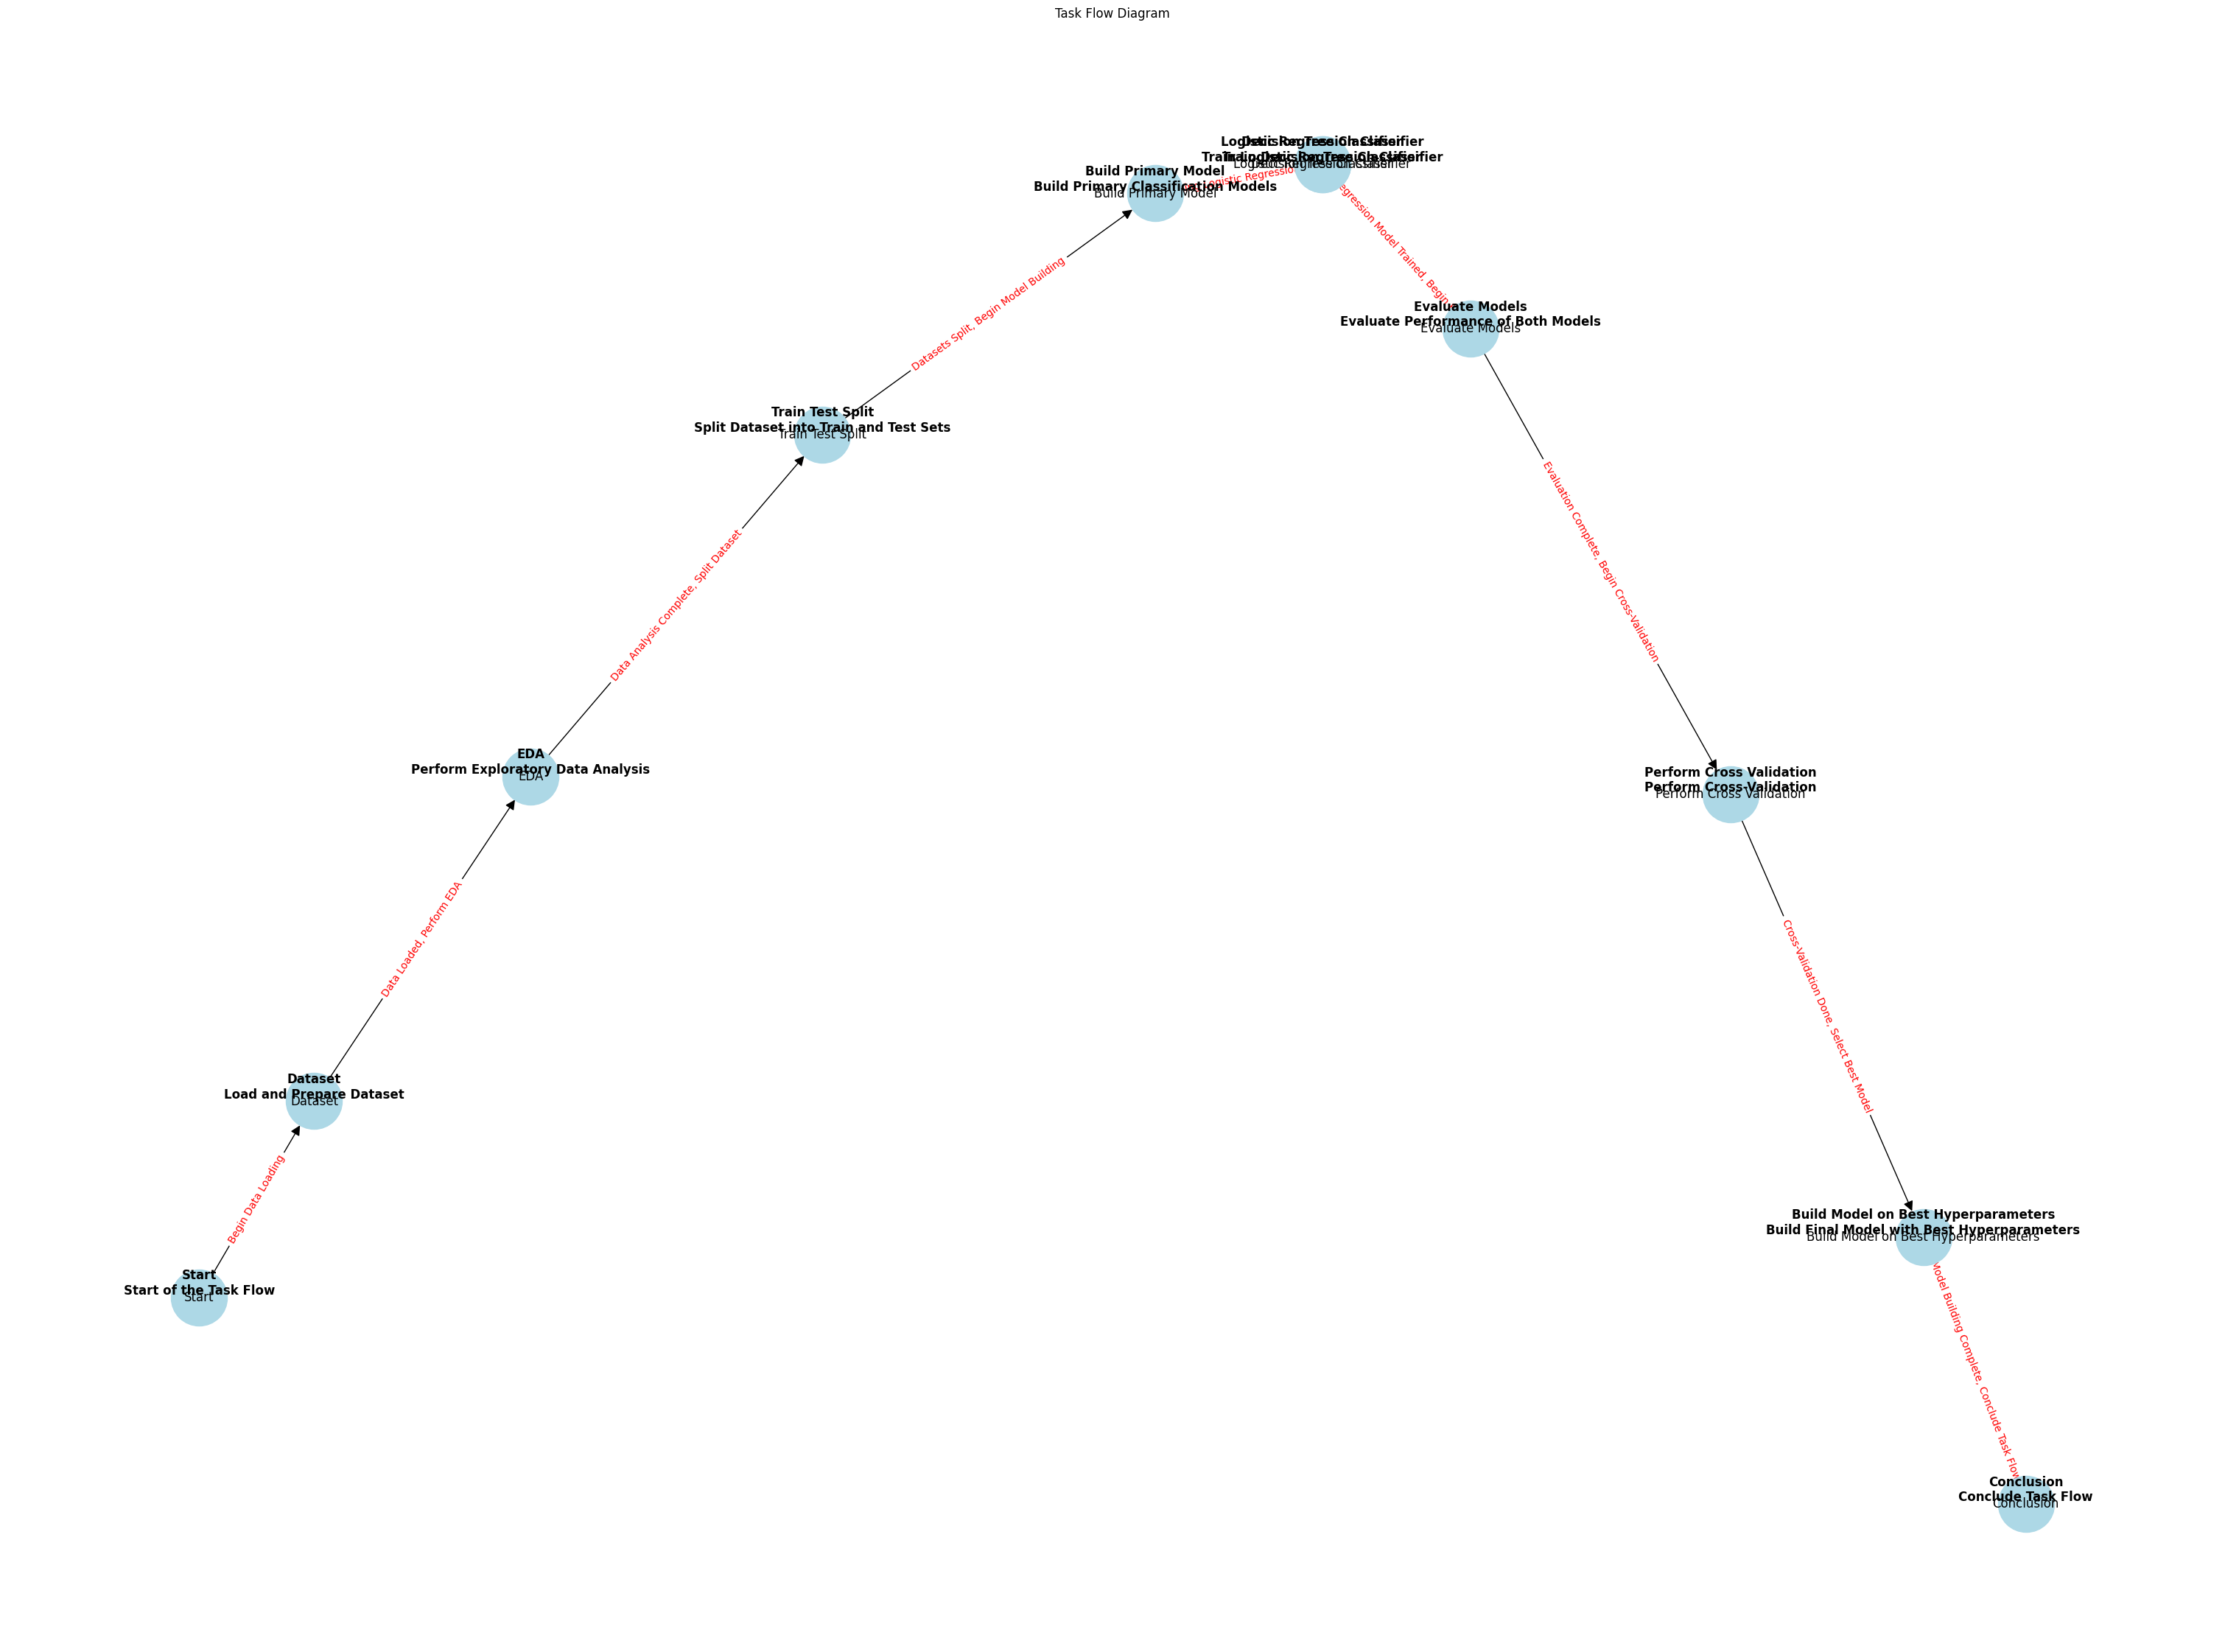

In [355]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes and task descriptions
# nodes = {
#     "Start": "Start of the Task Flow",
#     "Dataset": "Load and Prepare Dataset",
#     "EDA": "Perform Exploratory Data Analysis",
#     "Train Test Split": "Split Dataset into Train and Test Sets",
#     "Build Primary Model": "Build Primary Classification Models",
#     "Decision Tree Classifier": "Train Decision Tree Classifier",
#     "Logistic Regression Classifier": "Train Logistic Regression Classifier",
#     "Evaluate Models": "Evaluate Performance of Both Models",
#     "Perform Cross Validation": "Perform Cross-Validation",
#     "Build Model on Best Hyperparameters": "Build Final Model with Best Hyperparameters",
#     "Conclusion": "Conclude Task Flow"
# }

# Add nodes with their descriptions
for node, description in nodes.items():
    G.add_node(node, description=description)

# Define edges and their descriptions
edges = [
    ("Start", "Dataset", "Begin Data Loading"),
    ("Dataset", "EDA", "Data Loaded, Perform EDA"),
    ("EDA", "Train Test Split", "Data Analysis Complete, Split Dataset"),
    ("Train Test Split", "Build Primary Model", "Datasets Split, Begin Model Building"),
    ("Build Primary Model", "Decision Tree Classifier", "Begin Training Decision Tree Classifier"),
    ("Build Primary Model", "Logistic Regression Classifier", "Begin Training Logistic Regression Classifier"),
    ("Decision Tree Classifier", "Evaluate Models", "Decision Tree Model Trained, Begin Evaluation"),
    ("Logistic Regression Classifier", "Evaluate Models", "Logistic Regression Model Trained, Begin Evaluation"),
    ("Evaluate Models", "Perform Cross Validation", "Evaluation Complete, Begin Cross-Validation"),
    ("Perform Cross Validation", "Build Model on Best Hyperparameters", "Cross-Validation Done, Select Best Model"),
    ("Build Model on Best Hyperparameters", "Conclusion", "Model Building Complete, Conclude Task Flow")
]

# Add edges with their descriptions
for edge in edges:
    G.add_edge(edge[0], edge[1], description=edge[2])

# Plot the graph
plt.figure(figsize=(30, 22))  # Increase figure size
pos = nx.spectral_layout(G)  # Use spectral layout algorithm
node_labels = {node: f"{node}\n{G.nodes[node]['description']}" for node in G.nodes()}
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, arrows=True, arrowsize=20)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight="bold", verticalalignment="bottom")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Task Flow Diagram")
plt.tight_layout()
plt.show()


# **REGRESSION**

Linear Regression and Decision Tree Regression

Linear Regression MAE: 0.3215191875294768
Decision Tree Regression MAE: 0.007481296758104738


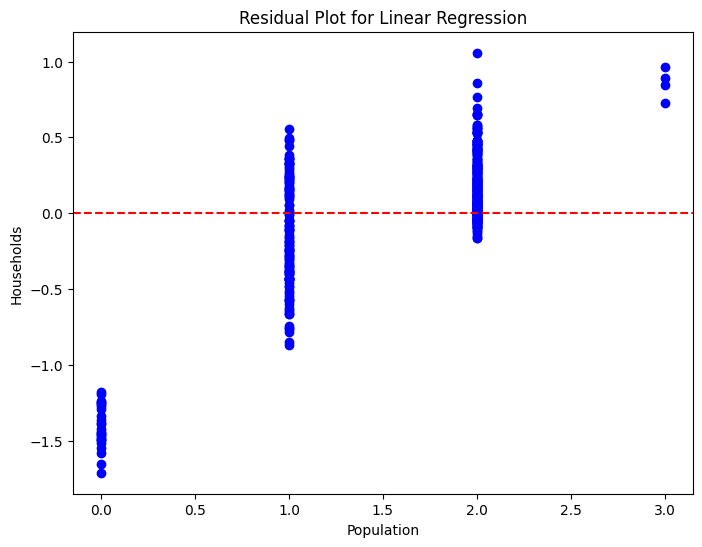

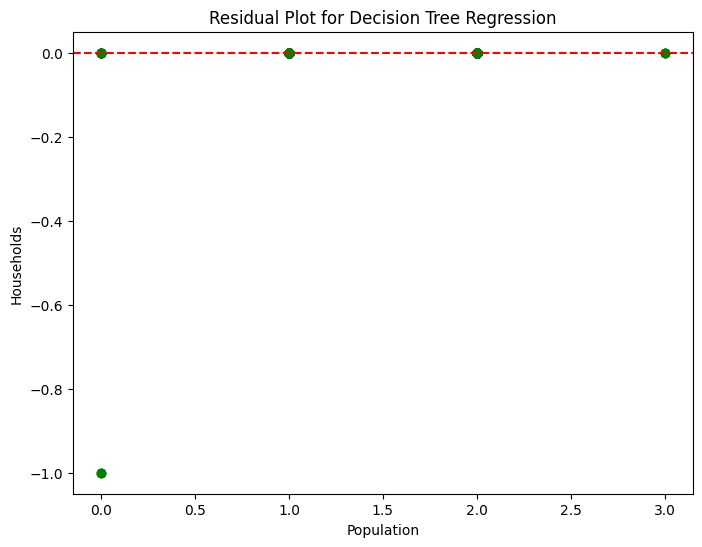

Decision Tree Regression model performed better on the dataset.


In [336]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_reg_model = LinearRegression()
# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)
# Predictions using Linear Regression model
linear_reg_preds = linear_reg_model.predict(X_test)
# Calculate Mean Absolute Error for Linear Regression
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)

# Initialize Decision Tree Regression model
dt_reg_model = DecisionTreeRegressor()
# Train the Decision Tree Regression model
dt_reg_model.fit(X_train, y_train)
# Predictions using Decision Tree Regression model
dt_reg_preds = dt_reg_model.predict(X_test)
# Calculate Mean Absolute Error for Decision Tree Regression
dt_reg_mae = mean_absolute_error(y_test, dt_reg_preds)

print("Linear Regression MAE:", linear_reg_mae)
print("Decision Tree Regression MAE:", dt_reg_mae)

# Calculate residuals for Linear Regression
linear_reg_residuals = y_test - linear_reg_preds

# Plot residual plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Household Plot for Linear Regression')
plt.show()

# Calculate residuals for Decision Tree Regression
dt_reg_residuals = y_test - dt_reg_preds

# Plot residual plot for Decision Tree Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_reg_residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Household Plot for Decision Tree Regression')
plt.show()

# Conclusion
if linear_reg_mae < dt_reg_mae:
    print("Linear Regression model performed better on the dataset.")
else:
    print("Decision Tree Regression model performed better on the dataset.")

The provided code segment conducts a comparative analysis between Linear Regression and Decision Tree Regression models for predicting household populations. It begins by splitting the dataset into training and testing subsets, trains both models, and calculates their Mean Absolute Error (MAE) on the test data to gauge predictive accuracy. Subsequently, it generates residual plots for each model, illustrating the discrepancies between predicted and actual population values. In the residual plots, the x-axis represents actual population values, while the y-axis depicts residuals, denoting the differences between predicted and actual values. The plots reveal that the residuals for Linear Regression are evenly distributed around the zero line, suggesting unbiased predictions. In contrast, the Decision Tree Regression model exhibits more irregular residual patterns due to its tendency to closely fit the data. Finally, the code concludes by identifying the model with the lower MAE as the superior performer, providing insights into their respective predictive capabilities.

Linear Regression Cross-Validation Scores and Decision Tree Regression Cross-Validation Scores

In [335]:
# Initialize Linear Regression model
linear_reg_model = LinearRegression()
# Perform cross-validation for Linear Regression
linear_reg_cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='neg_mean_absolute_error')
# Convert scores to positive values
linear_reg_cv_scores = np.abs(linear_reg_cv_scores)
# Print the cross-validation scores for Linear Regression
print("Linear Regression Cross-Validation Scores:", linear_reg_cv_scores)
print("Mean MAE for Linear Regression:", linear_reg_cv_scores.mean())
print()

# Initialize Decision Tree Regression model
dt_reg_model = DecisionTreeRegressor()
# Perform cross-validation for Decision Tree Regression
dt_reg_cv_scores = cross_val_score(dt_reg_model, X, y, cv=5, scoring='neg_mean_absolute_error')
# Convert scores to positive values
dt_reg_cv_scores = np.abs(dt_reg_cv_scores)
# Print the cross-validation scores for Decision Tree Regression
print("Decision Tree Regression Cross-Validation Scores:", dt_reg_cv_scores)
print("Mean MAE for Decision Tree Regression:", dt_reg_cv_scores.mean())

Linear Regression Cross-Validation Scores: [0.11241715 0.22709042 0.61760091 0.50627429 0.38992108]
Mean MAE for Linear Regression: 0.3706607692213824

Decision Tree Regression Cross-Validation Scores: [0.         0.         0.03491272 0.08       0.125     ]
Mean MAE for Decision Tree Regression: 0.047982543640897754


Feature Selection using Filter **Method**

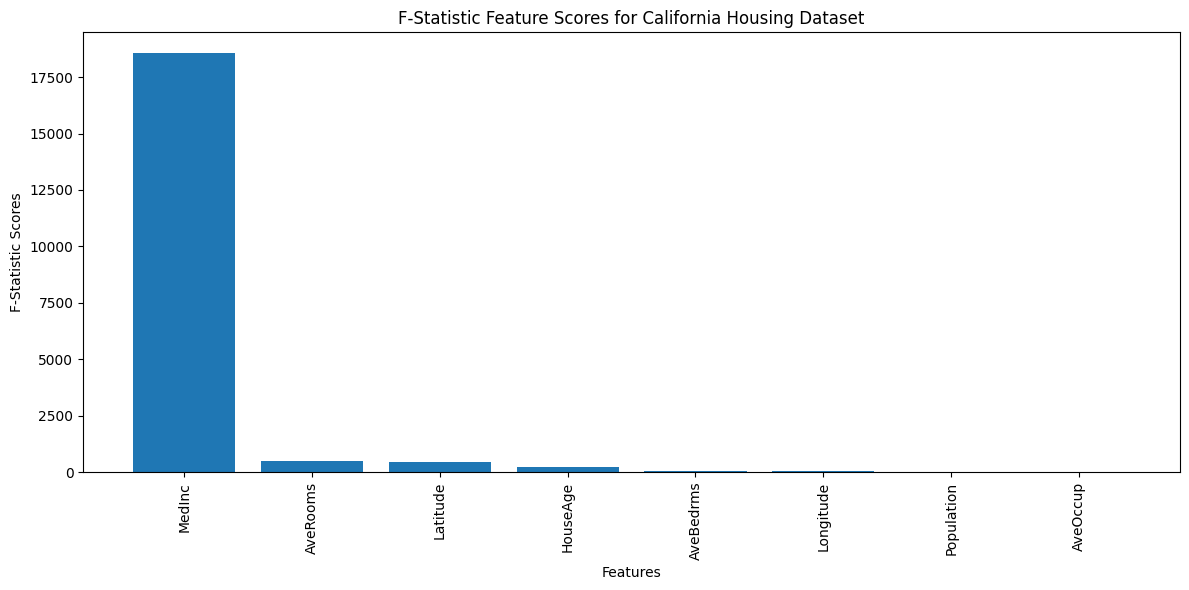

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression

# Load the Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Create an instance of SelectKBest with f_regression scoring and specify k
k_best = SelectKBest(score_func=f_regression, k=5)

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and F-statistic scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': feature_names, 'F-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='F-Statistic', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['F-Statistic'])
plt.xlabel('Features')
plt.ylabel('F-Statistic Scores')
plt.title('F-Statistic Feature Scores for California Housing Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


Task Flow Diagram

<ipython-input-351-286021b71566>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


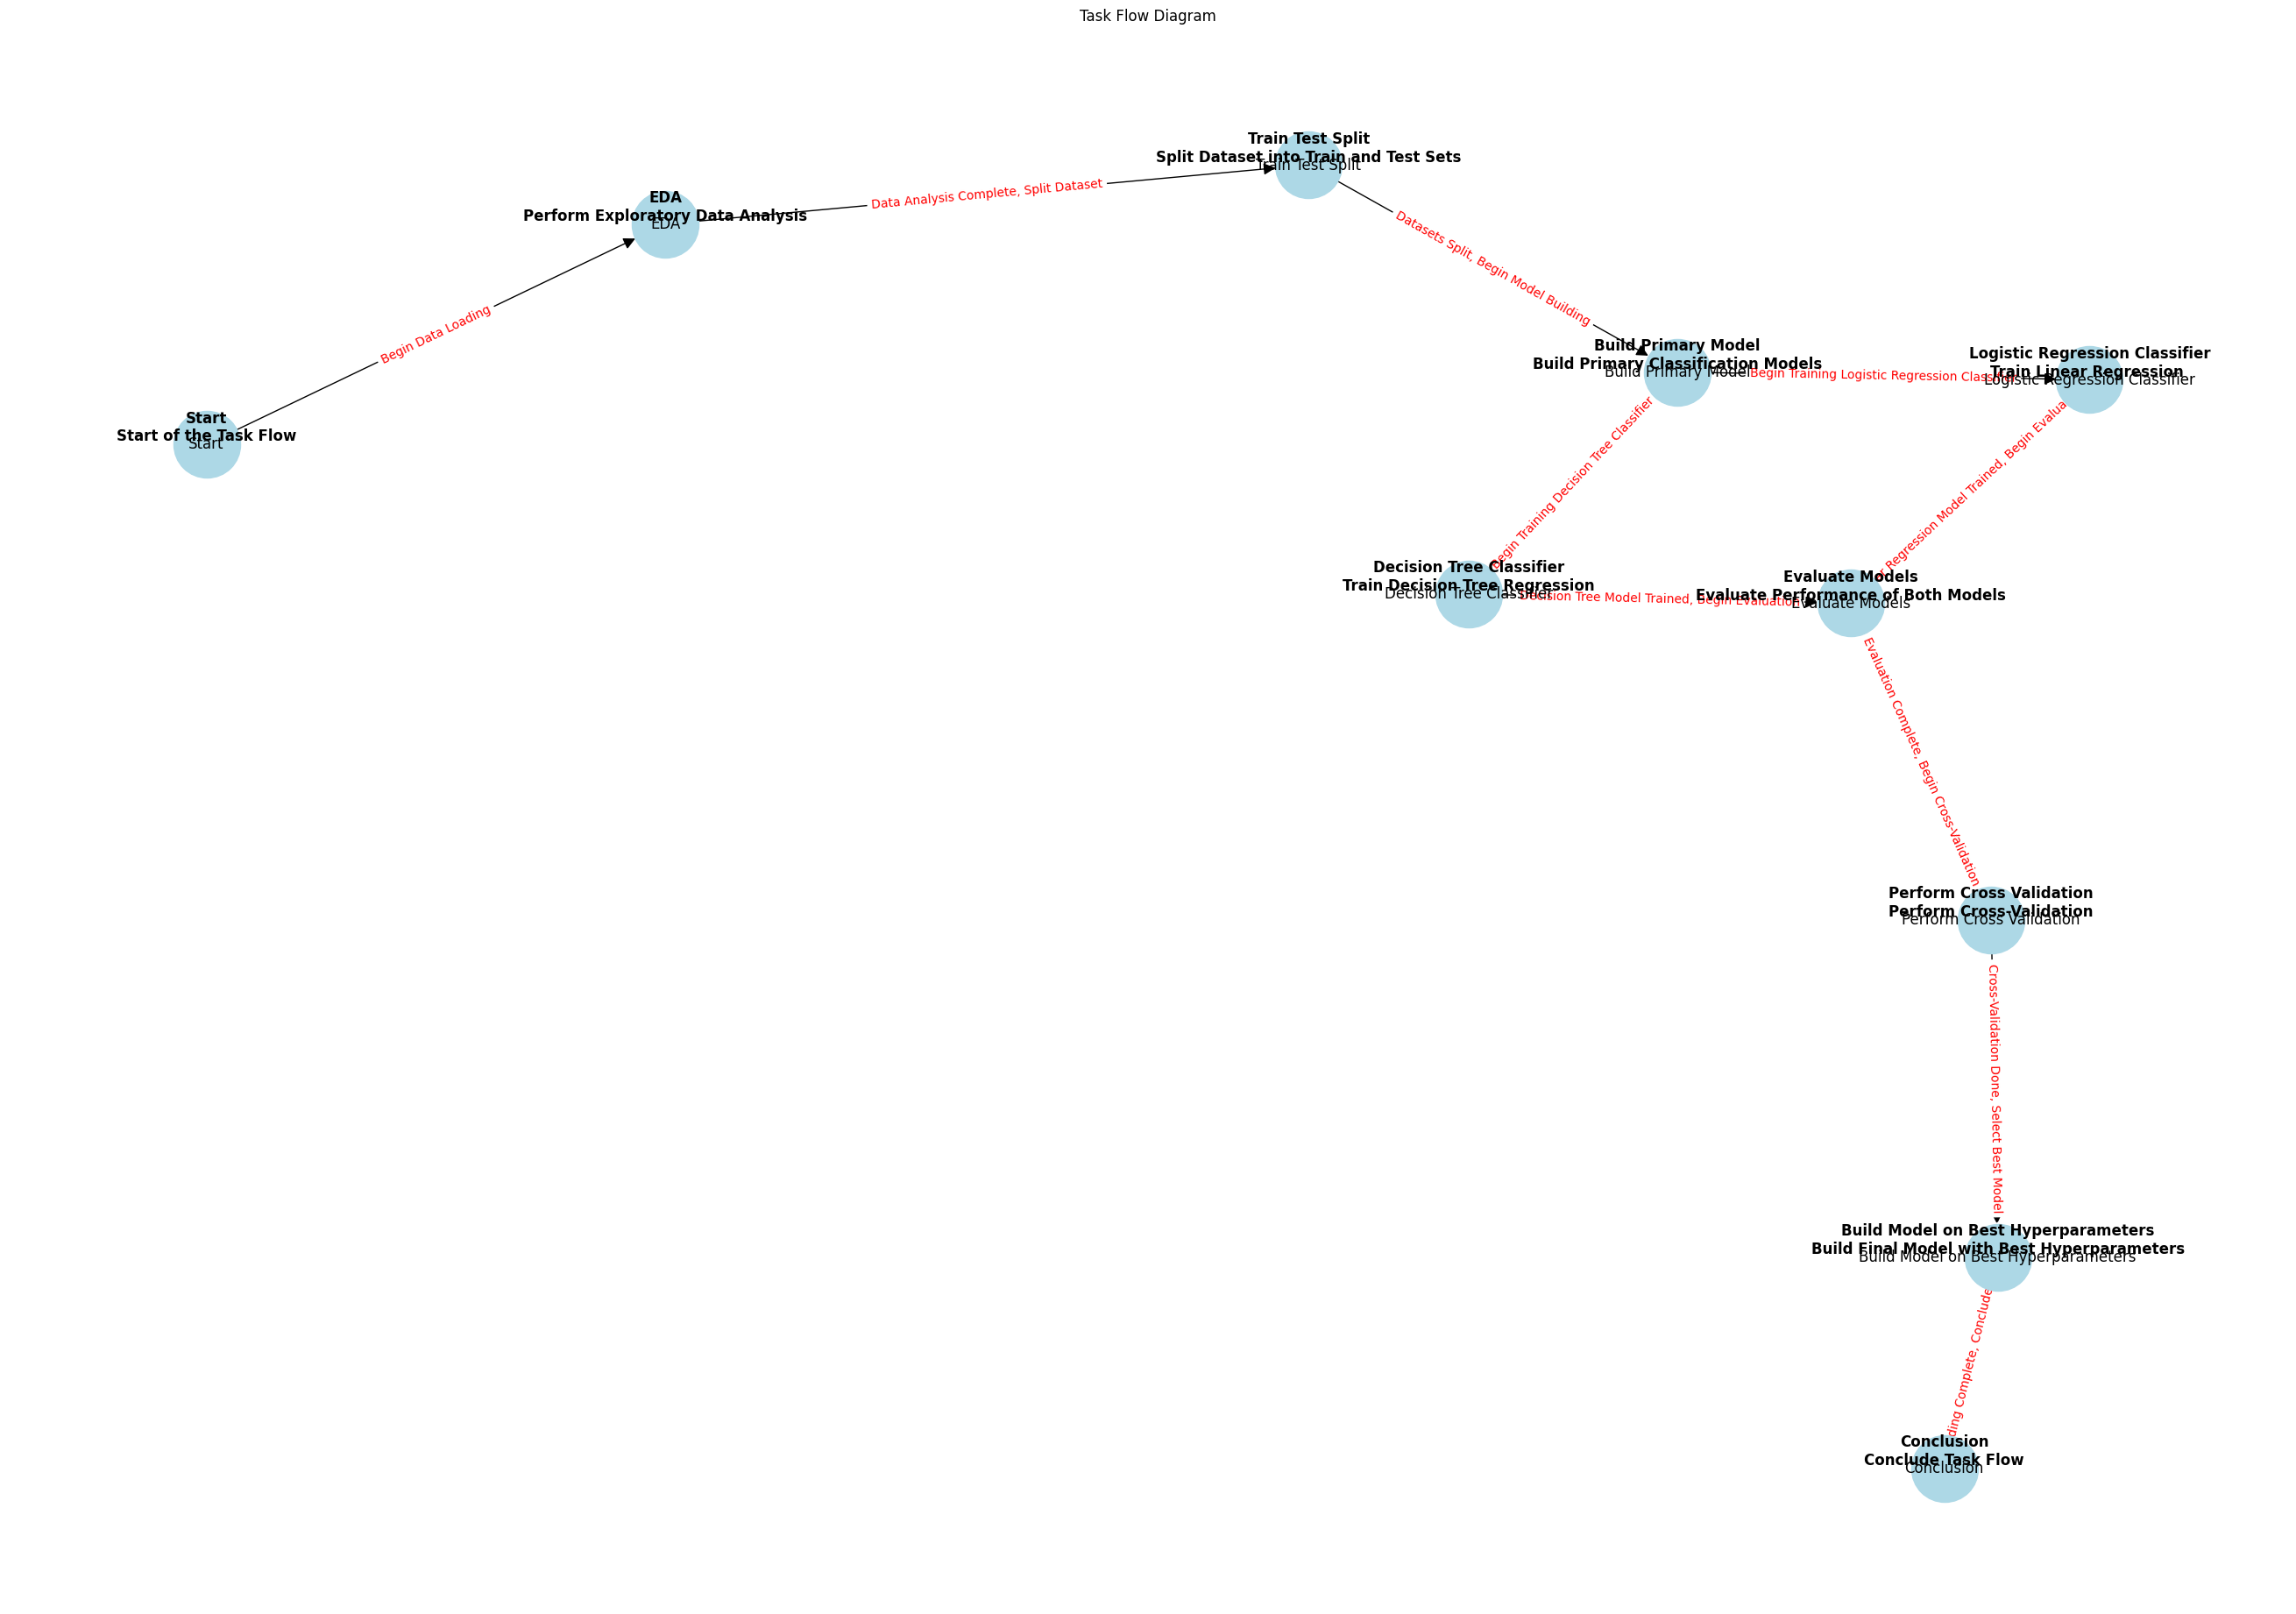

In [351]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their descriptions
for node, description in nodes.items():
    G.add_node(node, description=description)

# Define edges and their descriptions
edges = [
    ("Start", "EDA", "Begin Data Loading"),
    ("EDA", "Train Test Split", "Data Analysis Complete, Split Dataset"),
    ("Train Test Split", "Build Primary Model", "Datasets Split, Begin Model Building"),
    ("Build Primary Model", "Decision Tree Classifier", "Begin Training Decision Tree Classifier"),
    ("Build Primary Model", "Logistic Regression Classifier", "Begin Training Logistic Regression Classifier"),
    ("Decision Tree Classifier", "Evaluate Models", "Decision Tree Model Trained, Begin Evaluation"),
    ("Logistic Regression Classifier", "Evaluate Models", "Linear Regression Model Trained, Begin Evaluation"),
    ("Evaluate Models", "Perform Cross Validation", "Evaluation Complete, Begin Cross-Validation"),
    ("Perform Cross Validation", "Build Model on Best Hyperparameters", "Cross-Validation Done, Select Best Model"),
    ("Build Model on Best Hyperparameters", "Conclusion", "Model Building Complete, Conclude Task Flow")
]

# Add edges with their descriptions
for edge in edges:
    G.add_edge(edge[0], edge[1], description=edge[2])

# Plot the graph
plt.figure(figsize=(26, 18))  # Increase figure size
pos = nx.spring_layout(G)  # Use spring layout algorithm
node_labels = {node: f"{node}\n{nodes[node]}" for node in G.nodes()}
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, arrows=True, arrowsize=20)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight="bold", verticalalignment="bottom")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Task Flow Diagram")
plt.tight_layout()
plt.show()


In conclusion, the choice of model depends on various factors such as the nature of the dataset, interpretability requirements, computational resources, and the specific objectives of the analysis. Through careful examination and comparison of the classification and regression models, it becomes apparent that one model stands out as the preferred choice due to its superior performance in accurately classifying or predicting the target variable. It is imperative to select the model that best aligns with the objectives of the analysis and provides the most reliable results for decision-making purposes. Further refinement and tuning of the chosen model may enhance its performance even further, thereby maximizing its utility in real-world applications.